In [137]:
"""
Converts LOB data (prices, quotes) to images e.g. matrices indexed
by price and time with "pixel" values of quantities. The quantities
are normalized to be [0, 255] on the RGB spectrum.
"""

__author__ = "Justin Skillman"
__email__ = "jskillma@cmu.edu"

import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import tqdm

# Read  in Data
data_dir = './cnn_lob/data/'
filename = 'test_lob.csv'

lob = pd.read_csv(data_dir + filename)

# Compute Labels (returns over next nSecs seconds)
nSecs = 5
lob['return_sign'] = np.sign(lob.mid_top.pct_change(periods=nSecs))
# TODO: Use traded prices instead of mid

In [146]:
test = lob.tail(20)
df = test

In [228]:
# Create Images
def lob_snap_to_img(df, numtime_colname='timestamp'):
    
    uniq_prices = list(np.unique(df.filter(regex='_p').values.flatten()))
    uniq_times = df.timestamp.unique().tolist()
    R_img_df = pd.DataFrame(columns=uniq_times, index=uniq_prices) # ask sizes
    G_img_df = pd.DataFrame(columns=uniq_times, index=uniq_prices)  # bid sizes
    B_img_df = pd.DataFrame(columns=uniq_times, index=uniq_prices)  # num orders 
    
    for timestamp_j in uniq_times:
        ask_prices = df[df.timestamp == timestamp_j].filter(regex='ask_p').values.tolist()[0]
        bid_prices = df[df.timestamp == timestamp_j].filter(regex='bid_p').values.tolist()[0]
        ask_sizes = df[df.timestamp == timestamp_j].filter(regex='ask_q').values
        bid_sizes = df[df.timestamp == timestamp_j].filter(regex='bid_q').values
        
        R_img_df.loc[ask_prices, timestamp_j] = ask_sizes
        G_img_df.loc[bid_prices, timestamp_j] = bid_sizes
        B_img_df.loc[:, timestamp_j] = 1
        
    R = normalize_0_255(R_img_df.fillna(0).values)
    G = normalize_0_255(G_img_df.fillna(0).values)
    B = normalize_0_255(B_img_df.fillna(0).values)
    
    return R, G, B 


def normalize_0_255(arr):
    return ((arr - arr.min()) * (1/(arr.max() - arr.min()) * 255)).astype('uint8')

In [229]:
R, G, B = lob_snap_to_img(df)

/home/justin/Misc/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in long_scalars
/home/justin/Misc/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


In [234]:
R.shape

(31, 20)

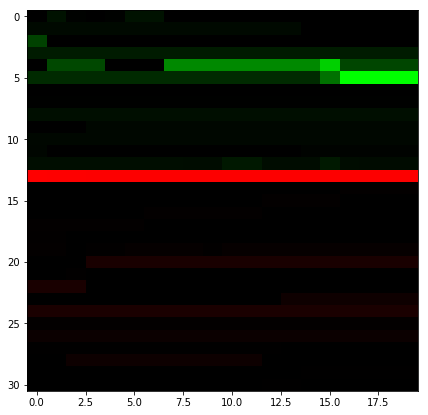

In [241]:
plt.figure(figsize=(7,7))
plt.imshow(np.swapaxes(np.array([R.T, G.T, B.T]), 0, 2), 
           interpolation='nearest', aspect='auto')
plt.show();